# CLASIFICACIÓN

##  📌 ACTIVIDAD 1:  MNIST

MNIST es un conjunto de pequeñas imágenes de dígitos escritos por estudiantes de institutos y empleados del censo de USA. Cada imagen está etiquetada con el dígito que representa.

Crea el notebook saa_02_p04_a1_<tus_iniciales>.ipynb donde realizar esta actividad

Nota: recuerda que los datasets cargados por scikit-Learn tienen estructura de diccionario incluyendo entre otras las claves:

• DESCR: descripción del dataset.

• data: DataFrame de pandas con una fila por instancia o ejemplo de datos y una columna por cada característica.

• target: un array con los labels de cada instancia

 Comprobamos la cantidad de datos y separamos predictoras y target:

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
print("Claves de mnist: ", mnist.keys())

X, y = mnist["data"], mnist["target"]
print("Dimensiones de X:", X.shape)

Claves de mnist:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Dimensiones de X: (70000, 784)


### PASO 1: PREPARAR LOS DATOS

Tiene imágenes cada una con 784 características porque son de tamaño 28×28 pixels y cada pixel 
representa la intensidad de luz (0 blanco a 255 el negro). Tiene aproximadamente la misma cantidad 
de ejemplos para cada dígito (0, 1, …, 9).

Para dibujar una de ellos lo único que tienes que hacer es extraer una instancia, cambiarle la estructura a 28×28 y usar la función imshow() de matplotlib:

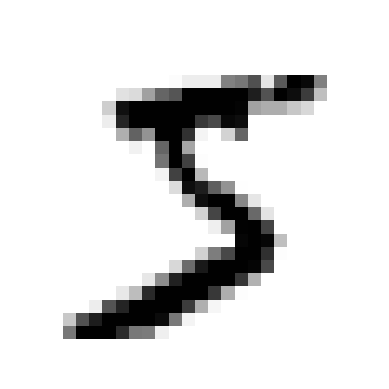

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

un_digito = X.iloc[0].to_numpy()
imagen_un_digito = un_digito.reshape(28, 28)

plt.imshow(imagen_un_digito, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

Vamos a entrenar modelos de clasificación binaria que aprendan a identificar los números 2 del resto. 
Primero vamos a cambiar el tipo de datos del target porque nos interesa que sean numéricos 0 (si no es 
un 2 y 1 cuando sea la imagen de un dígito 2).

Además vamos a generar el dataset de train y test, y luego lo vamos a adaptar para que nos sirva para entrenar el clasificador del 2. El tamaño del test lo dejamos al 1% porque hay bastantes instancias:

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

y = y.iloc[:].to_numpy()
y = y.astype(np.uint8)

print("Nuevo tipo de y[0]:", type(y[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=123)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)  #True para todas las instancias que sean del dígito 2

Nuevo tipo de y[0]: <class 'numpy.uint8'>


#### ENTREGAR:

 a) Modifica el código para que en la variable un_digito quede cargada la primera instancia que 
sea un 2.

 b) Cuando particiones los datos y realices otras operaciones aleatorias utiliza una semilla 
aleatoria que coincida con la longitud de tu nombre concatenada a la de tu primer apellido y 
concatenada a la de tu segundo apellido. En mi caso sería el valor 449 porque "Jose"=4, 
"Rosa"=4 y "=9.

 c) Indica cuantas instancias tenemos para entrenar y cuantas para testear

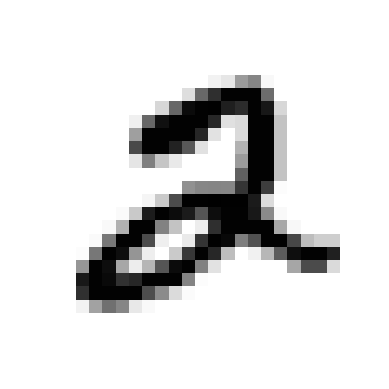

Instancias de entrenamiento: 63000
Instancias de testeo: 7000


In [5]:
#a) Encontrar la primera instancia que sea un 2
dice_dos = np.where(y == 2)[0][0]  # Encuentra el primer índice donde y es 2
un_digito = X.iloc[dice_dos].to_numpy()
imagen_un_digito = un_digito.reshape(28, 28)

#Mostrar la imagen del primer dígito 2
plt.imshow(imagen_un_digito, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

#b) Semilla aleatoria personalizada
semilla_aleatoria = int("475")  #longitud de mi nombre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=semilla_aleatoria)

#c) Imprimir cantidad de instancias para entrenamiento y testeo
print(f"Instancias de entrenamiento: {X_train.shape[0]}")
print(f"Instancias de testeo: {X_test.shape[0]}")

### PASO 2: ENTRENAR UN MODELO QUE IDENTIFIQUE EL DÍGITO 2

Para identificar el número 2 del resto, necesitamos un clasificador binario (2 clases en las que clasificar una instancia).

Usamos uno que use Descenso por Gradiente Estocástico (SGDClassifier) que es escalable (rápido con muchas filas o instancias) y apto para on-line al ir aprendiendo instancia a 
instancia de manera independiente

In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=123)
sgd.fit(X_train, y_train_2)

SGDClassifier(random_state=123)

 Para comprobar si se ha entrenado bien podemos probar la predicción que hace con algún ejemplo 
que conozcamos como por ejemplo el que tenemos en un_digito:

In [7]:
print("Predice un 2?:", sgd.predict([un_digito]))

Predice un 2?: [False]


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Pero lo ideal es medir lo bien que lo hace en muchos datos y además para que el resultado sea fiable 
esos datos no deben tener sesgos. Así que voy a obtener sus éxitos en varios conjuntos de datos 
usando validación cruzada de 3-Folds.

Usamos la función  cross_val_score() para validar el clasificador usando k-folds validación cruzada 
con un k de 3 (recuerda que la 3-folds validación cruzada divide el dataset train en 3 trozos y recorre 
todos los trozos validando en cada uno el modelo que entrena con el resto de trozos). Copia este 
código a continuación y completa los apartados que hay que entregar:

In [8]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd, X_train, y_train_2, cv=3, scoring="accuracy")
print(f"SGD: Accuracy en 3-folds: {cvs} Media: {cvs.mean()*100:.4f}%")

SGD: Accuracy en 3-folds: [0.89409524 0.72071429 0.83447619] Media: 81.6429%


### ENTREGAR:

**a) ¿Qué porcentaje de aciertos tiene el modelo cuando realiza predicciones?**

[0.71971429 0.84214286 0.83190476]

**b) Siendo un clasificador, ¿Si se acerca al 100% es un buen indicador de que ha aprendido bien?**

Sí, es lo que indica que se ajusta a la perfección

**c) Escribe el código del clasificador “Siempre Negativo” manera que hemos realizado con de abajo comprueba de la misma SGDClassifier si hace su trabajo con éxito (ten en cuenta que no necesita entrenamiento, cuando le pregunten si es un 2 siempre va a responder que no) por tanto no lo entrenes, solo lo validas y compruebas sus porcentajes de éxitos con este comportamiento que es independiente de los datos con los que trabaje**

In [9]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class SiempreNegativo(BaseEstimator):
    def fit(self, X, y):
        pass  # No necesita entrenamiento

    def predict(self, X):
        return np.zeros(len(X), dtype=bool)  # Siempre devuelve False (no es un 2)

#Crear y evaluar el clasificador SiempreNegativo
siempre_negativo_clf = SiempreNegativo()
cvs_negativo = cross_val_score(siempre_negativo_clf, X_train, y_train_2, cv=3, scoring="accuracy")

#Resultados
print(f"SiempreNegativo: Accuracy en 3-folds: {cvs_negativo} Media: {cvs_negativo.mean()*100:.4f}%")

SiempreNegativo: Accuracy en 3-folds: [0.89914286 0.9        0.90128571] Media: 90.0143%


**d) A la vista de los resultados del apartado es bueno?**

Sí, con una media de 90 % podríamos decir que sí

### PASO 3: VALIDAR EL MODELO CON LA MATRIZ DE CONFUSIÓN

Para calcular la matriz de confusión necesitamos predicciones que se puedan comparar con los valores 
reales de la columna target. Por ahora los datos de test los tenemos escondidos y reservados para las 
fases finales del proyecto, justo antes de decidir si ponemos en producción el sistema. Así que 
utilizamos la función cross_val_predict(). A continuación obtenemos la matriz de confusión con 
confusion_matrix()

In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_2, cv=3)

from sklearn.metrics import confusion_matrix
print(f"Mátriz de confusión: {confusion_matrix(y_train_2, y_train_pred)}")

Mátriz de confusión: [[50788  5921]
 [ 5644   647]]


 Además scikit-learn tiene funciones para cada métrica:

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precisión", precision_score(y_train_2, y_train_pred))
print("Recall", recall_score(y_train_2, y_train_pred))
print("F1 score", f1_score(y_train_2, y_train_pred))

Precisión 0.09850791717417783
Recall 0.10284533460499126
F1 score 0.10062990901314255


 Si queremos las métricas desglosadas por clases podemos pedir el informe de clasificación con la 
función clasification_report()

### ENTREGAR:
 a) Cada fila de la matriz de confusión representa una clase ()Real ()Predicha. Cada columna de la matriz de confusión representa una clase ()Real (X)Predicha.

 b) Para que el clasificador sea bueno ¿Dónde deben estar los valores más altos de la matriz de 
confusión? (X)En la diagonal.  ()Fuera de la diagonal.

 c) Observa la salida del informe de clasificación e indica la clase con peor accuracy pero no de 
todos los intentos sino de los intentos que sean positivos (es decir, de todos los positivos 
cuantos ha clasificado correctamente).

### PASO 4: EQUILIBRIO PRECISION / RECALL

Scikit-Learn no nos permite acceder directamente a los umbrales, pero como nos deja consultar los
scores que usa para predecir llamando al método decision_function() del clasificador en vez de usar
predict(), lo que nos devuelve un score para cada instancia y entonces hacemos predicciones usando
el umbral que queramos basándonos en estos scores:

In [12]:
y_scores = sgd.decision_function([un_digito])
print("Scores el primer 2:", y_scores)
umbral = 0
prediccion_de_un_digito = (y_scores > umbral)
print(f"Con un umbral de {umbral} Un 2 es un 2 = {prediccion_de_un_digito}")

Scores el primer 2: [-69.94756642]
Con un umbral de 0 Un 2 es un 2 = [False]


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


El clasificador SGDClassifier() usa un umbral igual a 0, así que el código anterior devuelve el mismo
resultado que predict(). Si cambiamos el umbral:

In [13]:
umbral = 8000
prediccion_de_un_digito = (y_scores > umbral)
print(f"Con un umbral de {umbral} Un 2 es un 2 = {prediccion_de_un_digito}")

Con un umbral de 8000 Un 2 es un 2 = [False]


### ENTREGAR:

a) A la vista del resultado, si subes el umbral ¿Subes la precisión o el recall?

b) Si queremos saber cuanto recall vamos a tener si queremos alcanzar una precisión del 90%,
lee el texto y completa el código siguiente para conseguir el gráfico de la figura

Como el umbral controla ambas métricas (precisión y recall) ¿Cómo elegir uno? Utilizamos
todas las instancias del entrenamiento usando cross_val_predict() pero indicando que
quieres scores de decisión en vez de predicciones. Con estos scores calculas las métricas de
precisión y recall para todos los posibles umbrales usando la función precision_recall_curve()
y puedes visualizarlo en un gráfico para ver como quedarán ambas métricas al escoger un
umbral. Normalmente si aumentas el umbral sube la precisión (bajan los FP) y baja el recall
(suben los FN), aunque puede haber zonas (según se distribuyen los scores de decisión) donde
se produzcan bajadas o subidas

In [ ]:
def plot_precision_recall_vs_umbrales(precisiones,recalls,umbrales):
    plt.plot(umbrales, precisiones[:-1], "b--", label="Precisión")
    plt.plot(umbrales, recalls[:-1], "g--", label="Recall", linewidth=2)

### PASO 5: LA CURVA ROC

La curva receiver operating characteristic (ROC) y la métrica AUC son otras herramientas usadas en los
clasificadores. También se utilizan para comparar varios clasificadores. Para dibujarla hay que calcular
el TPR y el FPR para diferentes valores de umbral usando la función roc_curve():

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt  # Importar matplotlib para graficar

fpr, tpr, umbrales = roc_curve(y_train_2, y_scores)

def plot_curva_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Dibujar los fpr y sus tpr asociados con plot() ancho de línea 2 y etiqueta label
    plt.plot([0, 1], [0, 1], 'k--')  # Dibujar una línea punteada en negro "k--" con plot() desde (0,0) a (1,1)

    plt.legend(loc="lower right", fontsize=14)  # plt.legend(loc="lower right", fontsize=14)

    plt.ylabel("TPR (recall)")  # Poner etiqueta del eje Y a "TPR (recall)" con ylabel()
    plt.xlabel("FPR")  # Poner etiqueta del eje x a "FPR" con xlabel()

    plt.grid(True)  # Activar la rejilla con grid()

plot_curva_roc(fpr, tpr)
plt.show()  # Mostrar la gráfica

ValueError: Found input variables with inconsistent numbers of samples: [63000, 1]